<a href="https://colab.research.google.com/github/eisbetterthanpi/vision/blob/main/bin_clss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title download
# # https://drive.google.com/file/d/1NkCNecLpFG3i7bo3Vl9RQSwzBpSRQ29q/view?usp=sharing
# !gdown 1NkCNecLpFG3i7bo3Vl9RQSwzBpSRQ29q -O gsv.zip
# !unzip /content/gsv.zip -d /content
# import shutil
# shutil.rmtree('/content/google_street_view/meta_data', ignore_errors=True) # delete the meta_data folder

# # clip cleaned
# # https://drive.google.com/file/d/1-xcHyVAMeTkY7SUdUyQRVAn_FFXPSDGB/view?usp=share_link
!gdown 1-xcHyVAMeTkY7SUdUyQRVAn_FFXPSDGB -O gsv.zip
!unzip /content/gsv.zip -d /
!rm -R /content/gsv/.ipynb_checkpoints
!rm -R /content/gsv/01/.ipynb_checkpoints
!rm -R /content/gsv/02/.ipynb_checkpoints
!rm -R /content/gsv/03/.ipynb_checkpoints
!rm -R /content/gsv/04/.ipynb_checkpoints
!rm -R /content/gsv/05/.ipynb_checkpoints
!rm -R /content/gsv/06/.ipynb_checkpoints

# # gsv 70k
# # https://drive.google.com/file/d/1-7ZC29k4VxXQkpnOuLfj7Ag_SFTM4LV8/view?usp=share_link
# !gdown 1-7ZC29k4VxXQkpnOuLfj7Ag_SFTM4LV8 -O gsv.zip
# !unzip /content/gsv.zip -d /
# # # !ls
# !ls -a /content/gsv70k
# !rm -R /content/gsv70k/.ipynb_checkpoints
# # # !rm -R /content/gsv/06/.ipynb_checkpoints

# # 70k+gmap
# # https://drive.google.com/file/d/1-CZp7TbhJLeRQpbKQCyT8ofGg89Yt137/view?usp=sharing
# !gdown 1-CZp7TbhJLeRQpbKQCyT8ofGg89Yt137 -O gsv.zip
# !unzip /content/gsv.zip -d /
# !rm -R /content/gsv70kg/.ipynb_checkpoints
# !rm -R /content/gsv70kg/01/.ipynb_checkpoints
# !rm -R /content/gsv70kg/02/.ipynb_checkpoints
# !rm -R /content/gsv70kg/03/.ipynb_checkpoints
# !rm -R /content/gsv70kg/04/.ipynb_checkpoints
# !rm -R /content/gsv70kg/05/.ipynb_checkpoints
# !rm -R /content/gsv70kg/06/.ipynb_checkpoints

# # https://bestasoff.medium.com/how-to-fine-tune-very-large-model-if-it-doesnt-fit-on-your-gpu-3561e50859af
# !pip install bitsandbytes


In [ ]:
# @title torch augment
# https://github.com/facebookresearch/vicreg/blob/main/augmentations.py
import torch
import torchvision.transforms as transforms

class TrainTransform(object):
    def __init__(self):
        self.transform = transforms.Compose([
                transforms.RandomPerspective(distortion_scale=0.3, p=0.5), # me
                transforms.RandomResizedCrop((400,640), scale=(0.7, 1.0), ratio=(0.8, 1.25), interpolation=transforms.InterpolationMode.BICUBIC),
                transforms.RandomHorizontalFlip(p=0.5), # 0.5
                transforms.RandomApply([transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)], p=0.8,), # brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)], p=0.8
                transforms.RandomGrayscale(p=0.2), # 0.2
                transforms.RandomApply([transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),], p=1.0),
                # transforms.RandomSolarize(threshold=130, p=0.5)
                transforms.RandomErasing(p=0.5, scale=(0.1, 0.11), ratio=(1,1), value=0, inplace=True), # default p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False
                # transforms.ToTensor(), # ToTensored at dataset level, no need to ToTensor again
                # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # normalised at dataset level. default 0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225
            ])

    def __call__(self, sample):
        dims = len(sample.shape)
        if dims==3: x1 = self.transform(sample) # same transforms per minibatch
        elif dims==4: x1 = transforms.Lambda(lambda x: torch.stack([self.transform(x_) for x_ in x]))(sample) # diff transforms per img in minibatch
        return x1


In [ ]:
# @title symbolic link
dir='/content/gsv/'
sym_link = '/content/sym/'

import os
if not os.path.exists(sym_link): os.makedirs(sym_link)

f1 = lambda x: dir+str(x).zfill(2)
f2 = lambda x: sym_link+str(x).zfill(2)
# print([f(x) for x in range(1,7) for f in (f1,f2)])
i, j = 5,6 # 5,6

# ls -l {}
sh = '''
rm {} {} {} {} {} {}
ln -s {} {}
ln -s {} {}
'''.format(*[f2(x) for x in range(1,7)], *[f(x) for x in [i,j] for f in (f1,f2)])

# print(sh)

with open('script.sh', 'w') as file:
  file.write(sh)
!bash script.sh

def make_sym(i, j):
    sh = '''
    rm {} {} {} {} {} {}
    ln -s {} {}
    ln -s {} {}
    '''.format(*[f2(x) for x in range(1,7)], *[f(x) for x in [i,j] for f in (f1,f2)])
    with open('script.sh', 'w') as file:
        file.write(sh)
    !bash script.sh


# combi = torch.combinations(torch.arange(0,6), with_replacement=True)
# i, j = 1,2 # 5,6
# datai = datasets.ImageFolder(dir+'/'+str(i).zfill(2), transform=None)
# # dataj = datasets.ImageFolder(dir+'/'+str(j).zfill(2), transform=None)
# # train_bin_set = torch.utils.data.ConcatDataset([datai, dataj])

# # construct the full dataset
# dataset = datasets.ImageFolder(dir, transform=None)
# # select the indices of all other folders
# # idx = [i for i in range(len(dataset)) if dataset.imgs[i][1] != dataset.class_to_idx['class_s']]
# # build the appropriate subset
# idx=[i,j]
# # data = torch.utils.data.Subset(dataset, idx)

# dataset=None

# indices = np.arange(data_size)
# np.random.shuffle(indices)
# split_index = int(np.floor(0.9 * data_size))
# train_idx, test_idx = indices[:split_index], indices[split_index:]
# train_data = torch.utils.data.Subset(data, train_idx)
# test_data = torch.utils.data.Subset(data, test_idx)
# targets = np.array(data.targets)


# print(data.targets)
# indices[np.where[data.targets==i or data.targets==j]]





In [ ]:
# @title data weighted
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# dataset has PILImage images of range [0, 1], transform them to Tensors of normalized range [-1, 1]
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
# transform = transforms.Compose(transforms.ToTensor())

# dir='/content/google_street_view'
# dir='/content/gsv70k'
dir='/content/gsv'
# dir='/content/sym'

# data = datasets.ImageFolder(dir, transform=transform)
data = datasets.ImageFolder(dir, transform=None)

torch.manual_seed(0)

# train_data, test_data = torch.utils.data.random_split(data, [.85,.15])
# https://www.scaler.com/topics/pytorch/how-to-split-a-torch-dataset/
data_size = len(data)
indices = np.arange(data_size)
np.random.shuffle(indices)
split_index = int(np.floor(0.9 * data_size))
train_idx, test_idx = indices[:split_index], indices[split_index:]
train_data = torch.utils.data.Subset(data, train_idx)
test_data = torch.utils.data.Subset(data, test_idx)
targets = np.array(data.targets)
train_targets = targets[train_idx]
test_targets = targets[test_idx]

from torch.utils.data import Dataset
class DatasetWrap(Dataset):
    def __init__(self, dataset, transform=None):
        super(DatasetWrap, self).__init__()
        self.dataset = dataset
        self.transform = transform
        self.datasize = len(self.dataset)

    def __len__(self):
        return self.datasize

    def __getitem__(self, index):
        x, y = self.dataset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

# train_data = DatasetWrap(train_data, TrainTransform()) # apply data augmentation to train dataset only
train_data = DatasetWrap(train_data, transform) # apply transform during training to use gpu
test_data = DatasetWrap(test_data, transform)

batch_size = 16 # 16/64

# https://stackoverflow.com/questions/62319228/number-of-instances-per-class-in-pytorch-dataset
from collections import Counter
class_count = torch.tensor(list(Counter(data.targets).values()))
weights=1./class_count
# weights=sum(class_count)/class_count
# https://pytorch.org/docs/stable/data.html#torch.utils.data.WeightedRandomSampler
train_weight = weights[train_targets]
test_weight = weights[test_targets]
# train_sampler = torch.utils.data.WeightedRandomSampler(train_weight, len(train_weight))
# test_sampler = torch.utils.data.WeightedRandomSampler(test_weight, len(test_weight))
train_sampler = torch.utils.data.WeightedRandomSampler(train_weight, 10000)
test_sampler = torch.utils.data.WeightedRandomSampler(test_weight, 1000)
train_loader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=batch_size, num_workers=4, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=batch_size, num_workers=4, pin_memory=True)
data, train_data, test_data = None, None, None
num_batches=int(np.ceil(len(train_loader)/batch_size))

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# dataiter = iter(train_loader)
# images, labels = next(dataiter)
# imshow(torchvision.utils.make_grid(images,nrow=4))
# dataiter=None
# print(labels)

# dataiter = iter(test_loader)
# images, labels = next(dataiter)
# imshow(torchvision.utils.make_grid(images,nrow=4))
# dataiter=None

# for x in [5,6]:
#     allfiles = os.listdir('/content/sym/0'+str(x)+'/')
#     print(x,len(allfiles))


def make_loader():
    data = datasets.ImageFolder(dir, transform=None)
    data_size = len(data)
    indices = np.arange(data_size)
    np.random.shuffle(indices)
    split_index = int(np.floor(0.9 * data_size))
    train_idx, test_idx = indices[:split_index], indices[split_index:]
    train_data = torch.utils.data.Subset(data, train_idx)
    test_data = torch.utils.data.Subset(data, test_idx)
    targets = np.array(data.targets)
    train_targets = targets[train_idx]
    test_targets = targets[test_idx]

    # train_data = DatasetWrap(train_data, TrainTransform()) # apply data augmentation to train dataset only
    train_data = DatasetWrap(train_data, transform)
    test_data = DatasetWrap(test_data, transform)

    class_count = torch.tensor(list(Counter(data.targets).values()))
    weights=1./class_count
    # weights=sum(class_count)/class_count
    train_weight = weights[train_targets]
    test_weight = weights[test_targets]
    # train_sampler = torch.utils.data.WeightedRandomSampler(train_weight, len(train_weight))
    # test_sampler = torch.utils.data.WeightedRandomSampler(test_weight, len(test_weight))
    train_sampler = torch.utils.data.WeightedRandomSampler(train_weight, 10000)
    test_sampler = torch.utils.data.WeightedRandomSampler(test_weight, 1000)
    train_loader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=batch_size, num_workers=4, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=batch_size, num_workers=4, pin_memory=True)
    data, train_data, test_data = None, None, None
    num_batches=int(np.ceil(len(train_loader)/batch_size))
    return train_loader, test_loader



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


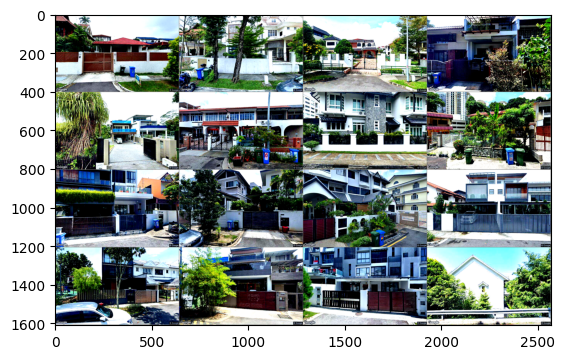

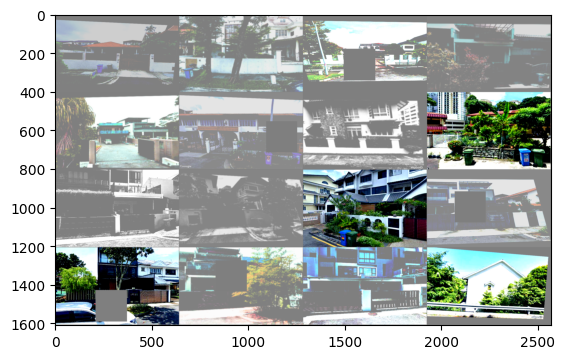

tensor([0, 5, 1, 5, 4, 1, 5, 0, 4, 4, 2, 5, 5, 5, 4, 2])


In [ ]:
# data = datasets.ImageFolder(dir, transform=None)
# dataiter = iter(data)
# images, labels = next(dataiter)
# imshow(torchvision.utils.make_grid(images,nrow=1))
# dataiter=None
# print(labels)

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images,nrow=4))
img=trs(images)
imshow(torchvision.utils.make_grid(img,nrow=4))
dataiter=None
print(labels)

# dataiter = iter(test_loader)
# images, labels = next(dataiter)
# imshow(torchvision.utils.make_grid(images,nrow=4))
# dataiter=None

In [ ]:
# @title resnet
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
# # https://pytorch.org/vision/0.12/models.html#id10
model = models.resnet18(weights='DEFAULT') # 18 34 50 101 152
num_ftrs = model.fc.in_features
model.fc = nn.Sequential( # og (fc): Linear(in_features=512, out_features=1000, bias=True)
    nn.Linear(num_ftrs, 2),
    # nn.Linear(num_ftrs, 128), nn.ReLU(), nn.Linear(128, 2),
    nn.Softmax(dim=1),
    )

# # model.mods = [module for k, module in model._modules.items()]
# # modules = [module for k, module in model._modules.items()]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
# model = torch.compile(model.to(device))
# model = torch.compile(model.to(device),mode='max-autotune')

def make_model():
    model = models.resnet18(weights='DEFAULT') # 18 34 50 101 152
    num_ftrs = model.fc.in_features
    model.fc = nn.Sequential( # og
        nn.Linear(num_ftrs, 2, bias=False),
        # nn.Linear(num_ftrs, 128), nn.ReLU(),
        # nn.Linear(128, 2),
        nn.Softmax(dim=1),
        )
    model = torch.compile(model.to(device),mode='max-autotune')
    return model



In [ ]:
# @title try

# # check model's input and output dimensions are correct
x0 = torch.rand(16, 3, 400, 640, device=device)
x1 = torch.rand(16, 3, 400, 640, device=device)
model.eval()
pred0 = model(x0)
pred1 = model(x1)
print(pred0.shape)
print(torch.cat((pred0, pred1),).shape)

pred = bincls(torch.cat((pred0, pred1),-1))

# targets = torch.randint(0,6,(16,), device=device)
targets = torch.randint(0,3,(16,), device=device)/2
print(targets)



In [ ]:
# @title train test function
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True
scaler = torch.cuda.amp.GradScaler()
# https://github.com/prigoyal/pytorch_memonger/blob/master/models/optimized/resnet_new.py
from torch.utils.checkpoint import checkpoint, checkpoint_sequential

trs=TrainTransform()
# train function with automatic mixed precision
def strain(dataloader, model, loss_fn, optimizer, scheduler=None, verbose=True):
    # size = len(dataloader.dataset)
    size = len(dataloader)
    model.train()
    loss_list = []
    for batch, (x, y) in enumerate(dataloader):
        sx, sy = x.to(device), y.to(device)
        with torch.cuda.amp.autocast(): # automatic mixed percision
            sx = trs(sx)
            pred = model(sx) # [16, 512]
            loss = loss_fn(pred, sy)

            # modules = [module for k, module in model._modules.items()]
            # pred = checkpoint_sequential(functions=modules, segments=1, input=sx) # gradient checkpointing for resnet and inception only
            # # # pred = checkpoint_sequential(functions=model.mods, segments=1, input=sx)
            # loss = loss_fn(pred, sy) # /4 to scale by gradient accumulation_steps

        scaler.scale(loss).backward()
        # if ((batch + 1) % 4 == 0) or (batch + 1 == len(dataloader)): # gradient accumulation
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad()

        if scheduler is not None:
            scheduler.step()

        loss_list.append(loss.item())
        # loss.backward()
        # optimizer.step()
        # if (batch) % (size//(10* len(y))) == 0:
        # if batch % (size//10) == 0:
        if batch % ((dataloader.sampler.num_samples/dataloader.batch_size)//10) == 0:
            loss, current = loss.item()/len(y), batch * len(x)
            # if verbose: print(f"loss: {loss:>7f} [{current:>5d}/{size*len(y):>5d}]")
            if verbose: print(f"loss: {loss:>7f} [{current:>5d}/{dataloader.sampler.num_samples:>5d}]")
    return loss_list

def test(dataloader, model, loss_fn, verbose=True):
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for batch, (x, y) in enumerate(dataloader):
            sx, sy = x.to(device), y.to(device)
            pred = model(sx)
            # loss = loss_fn(pred, y)
            test_loss += loss_fn(pred, sy).item()
            correct += (pred.argmax(1) == sy).type(torch.float).sum().item()
    # test_loss /= num_batches
    # correct /= num_batches*len(y)
    test_loss /= dataloader.sampler.num_samples
    correct /= dataloader.sampler.num_samples
    if verbose: print(f"Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}")
    return correct, test_loss


In [ ]:
# @title LR range test
# 1cycle super convergencehttps://arxiv.org/pdf/1708.07120.pdf
# # cyclic lr https://arxiv.org/pdf/1506.01186.pdf
# Note the learning rate value when the accuracy starts to
# increase and when the accuracy slows, becomes ragged, or starts to fall

# one training run of the network for a few epochs

pth='/content/lr.pth'
torch.save(model.state_dict(), pth) # save temporary model for lr finding

epochs=1#5
min_lr= 1e-7
max_lr= 1e-3 # 1e-2
# 152: 1e-7 - 1e-4      result 3e-7 - 3e-6

loss_fn = nn.CrossEntropyLoss()
# loss_fn = nn.BCEWithLogitsLoss() # loss with sigmoid, so model no need sigmoid

model.load_state_dict(torch.load("lr.pth"))
# optimizer = torch.optim.AdamW(model.parameters(), lr=start_lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr=start_lr, momentum=0.9)
import bitsandbytes as bnb
optimizer = bnb.optim.AdamW(model.parameters(), lr=min_lr, betas=(0.9, 0.999), optim_bits=8)

# num_batches=int(np.ceil(len(test_loader)/batch_size))
num_batches=len(train_loader)
# num_batches=len(test_loader)

# total_steps=int(np.ceil(num_batches/4)*epochs)
total_steps=int(num_batches*epochs)

# min_lr* gamma^total_steps = max_lr
gamma = np.exp(np.log(max_lr/min_lr)/total_steps) # for scheduler step every optimizer step
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma) # 0.75(20)-0.9(100)
train_lst, test_lst=[],[]
lr_list=np.ones(total_steps)*min_lr*gamma**np.arange(total_steps)
# gamma = np.exp(np.log(max_lr/min_lr)/(total_steps*4)) # total_steps*4 bec grad accumulation, loss step 4x per lr step
# lr_list=np.ones(total_steps*4)*min_lr*gamma**np.arange(total_steps*4)


for i in range(epochs):
    # train_ls = strain(test_loader, model, loss_fn, optimizer, scheduler)
    train_ls = strain(train_loader, model, loss_fn, optimizer, scheduler)
    train_lst.extend(train_ls)


# https://stackoverflow.com/a/53472966/13359815
from scipy.ndimage.filters import gaussian_filter1d
train_lstsm = gaussian_filter1d(train_lst, sigma=3)
end=200

import matplotlib.pyplot as plt
plt.plot(lr_list, train_lst)
plt.plot(lr_list, train_lstsm)
# plt.plot(lr_list[:end], train_lst[:end])
# plt.plot(lr_list[:end], train_lstsm[:end])
plt.xscale('log')
# plt.plot(train_lst)
# plt.plot(np.linspace(0,len(train_lst),len(test_lst)), test_lst)
plt.show()
plt.close()

print(len(lr_list))
start, end = 20, 220
plt.plot(lr_list[:end], train_lst[:end])
plt.plot(lr_list[:end], train_lstsm[:end])
plt.xscale('log')
plt.show()


In [ ]:
# @title wwwwwwwww
import time
start = time.time()
acc_lst, train_lst, test_lst=[],[],[]
loss_fn = nn.CrossEntropyLoss()

base_lr, max_lr = 1e-6, 3e-5 # 1e-5, 1e-3 #0.5#
# res152 3e-7, 3e-6
# base_lr, max_lr = 3e-6, 3e-4
end_lr, start_lr = 1e-5, 1e-3 # 0.0001,0.1

epochs = 5 #5 20
# optimizer = torch.optim.SGD(model.parameters(), lr = start_lr, momentum=0.9)
# optimizer = torch.optim.AdamW(model.parameters(), lr=base_lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=3e-6)
import bitsandbytes as bnb # 8bit optimizer
optimizer = bnb.optim.AdamW(model.parameters(), lr=base_lr, betas=(0.9, 0.999), optim_bits=8)
# optimizer = bnb.optim.AdamW(model.parameters(), lr=1e-5, betas=(0.9, 0.999), optim_bits=8)
# 152 1e-5
# cnn 3e-4

div_factor = max_lr/base_lr
num_batches=len(train_loader)
total_steps=int(num_batches*epochs)+1
# total_steps=int(np.ceil(num_batches/4)*epochs)+1 # +1 to excluse uptick at the end of onecycle
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=max_lr, total_steps=total_steps, pct_start=0.45, anneal_strategy='cos', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=div_factor, final_div_factor=100.0, three_phase=True,)
# scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=max_lr, epochs=epochs, steps_per_epoch=num_batches, pct_start=0.45, anneal_strategy='cos', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=div_factor, final_div_factor=10000.0, three_phase=True,)
# gamma = np.exp(np.log(end_lr/start_lr)/(num_batches*epochs)) # for scheduler step every optimizer step
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma) # 0.75(20)-0.9(100)


pth='/content/resnet.pth'
# pth='/content/drive/MyDrive/frame/resnet.pth'

# to continue training
# tp, modelsd, optimsd, schedsd = torch.load(pth).values()
# model.load_state_dict(modelsd)
# optimizer.load_state_dict(optimsd)
# scheduler.load_state_dict(schedsd)


for t in range(tp,epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    lr=optimizer.param_groups[0]["lr"]
    print(lr)
    train_ls = strain(train_loader, model, loss_fn, optimizer, scheduler)
    correct, test_loss = test(test_loader, model, loss_fn)
    train_lst.extend(train_ls)
    # test_lst.append(test_loss)
    # acc_lst.append(correct)

    checkpoint = { # https://discuss.pytorch.org/t/saving-model-and-optimiser-and-scheduler/52030
    'epoch': t,
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict(),
    'lr_sched': scheduler.state_dict()}
    torch.save(checkpoint, 'checkpoint.pth')
    # torch.save(model.state_dict(), pth)

print("Done!")

end = time.time()
print("time: ",end - start)

# print(len(train_lst), len(test_lst))
import matplotlib.pyplot as plt
plt.plot(train_lst)
# plt.plot(np.linspace(0,len(train_lst),len(test_lst)), test_lst.cpu().numpy())
# plt.plot(np.linspace(0,len(train_lst),len(test_lst)), test_lst)
plt.show()
plt.plot(acc_lst)
plt.show()
plt.close()


torch.save(model.state_dict(), "model.pth")

# res18 1e-6, 3e-5 nobias sig,crossentropy cls56 sampler10k retrain 54.4%, 575s
# res18 nobias cls56 sampler10k 55.1%, 598s
# res18 1e-6, 3e-5 2layer,bias cls56 sampler10k 56.0%, 615





In [ ]:
correct, test_loss = test(test_loader, model, loss_fn)
print(correct, test_loss)

Accuracy: 53.3%, Avg loss: 0.048154
0.533 0.048153585374355316


In [ ]:
# @title bin clss train
import time
start = time.time()
loss_fn = nn.CrossEntropyLoss()

base_lr, max_lr = 1e-6, 3e-5 # 1e-5, 1e-3 #0.5#
# 1e-5:1e-4 18
# 3e-7:3e-6 152

epochs = 5 #5 20
div_factor = max_lr/base_lr
num_batches=len(train_loader)
total_steps=int(num_batches*epochs)+1
# total_steps=int(np.ceil(num_batches/4)*epochs)+1 # +1 to excluse uptick at the end of onecycle

model_dict={}
combi = torch.combinations(torch.arange(0,6), with_replacement=True)
for i, j in combi:
    print(str(i)+str(j)+"##############")
    make_sym(i, j)
    train_loader, test_loader = make_loader()
    model = make_model()
    optimizer = bnb.optim.AdamW(model.parameters(), lr=base_lr, betas=(0.9, 0.999), optim_bits=8)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=max_lr, total_steps=total_steps, pct_start=0.45, anneal_strategy='cos', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=div_factor, final_div_factor=100.0, three_phase=True,)
    for t in range(0,epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        lr=optimizer.param_groups[0]["lr"]
        print(lr)
        train_ls = strain(train_loader, model, loss_fn, optimizer, scheduler,verbose=False)
        correct, test_loss = test(test_loader, model, loss_fn)
        train_lst.extend(train_ls)
    model_dict['model'+str(i)+str(j)] = model.state_dict()
    torch.save(model_dict, "bin_models.pth")


print("Done!")
end = time.time()
print("time: ",end - start)


In [ ]:
# @title bin clss infer store
import torch
# imgs
# b,c,h,w = imgs.shape
b=16

# model_dict = torch.load(pth)
combi = torch.combinations(torch.arange(0,6), with_replacement=True)
# clss=6

def get_vote(imgs):
    vote=torch.empty(0)

    t=0
    for i, j in combi:
        # # model_dict['model'+str(i)+str(j)] = model.state_dict()
        # # model.load_state_dict(torch.load(pth))
        # # model.load_state_dict(model_dict['model'+str(i)+str(j)])
        # # (vi,vj) = model(imgs)
        # (vi,vj) = torch.rand((b,2)).split(1,1) #
        vivj = torch.rand((b,2))
        vivj = model(imgs)
        vote = torch.cat((vote, vivj), -1)

        # t+=1
        # if t>3: break

    print(vote.shape)
    print(vote)
    # print(vote[0])
    return vote

pred = ensemble(vote)



In [ ]:
# @title bin clss infer
import torch
# imgs
# b,c,h,w = imgs.shape
b=16

# model_dict = torch.load(pth)
combi = torch.combinations(torch.arange(0,6), with_replacement=True)
clss=6
vote=torch.zeros(b,clss)

t=0
def infer():
    for i, j in combi:
        # model_dict['model'+str(i)+str(j)] = model.state_dict()
        # model.load_state_dict(torch.load(pth))
        # model.load_state_dict(model_dict['model'+str(i)+str(j)])
        # (vi,vj) = model(imgs)
        (vi,vj) = torch.rand((b,2)).split(1,1) #
        vote[:,i] = vote[:,i] + vi.squeeze()
        vote[:,j] = vote[:,j] + vj.squeeze()
        # t+=1
        # if t>3: break


In [ ]:
# @title ensemble

class Ensemble(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes # 6
        self.in_dim = num_classes*(num_classes+1)/2 # 21
        h_dim = 32
        self.fwd = nn.Sequential(nn.Linear(self.in_dim, h_dim), nn.ReLU(),
                            # nn.Linear(h_dim, h_dim), nn.ReLU(),
                            Block(h_dim, h_dim, 0.5),
                            Block(h_dim, h_dim, 0.4),
                            Block(h_dim, h_dim, 0.3),
                            Block(h_dim, h_dim, 0.1),
                            nn.Linear(h_dim, self.num_classes),
                            nn.Softmax(dim=1),
                            )
    def forward(self, x):
        out = self.fwd(x)
        return out


class Block(nn.Module):
    def __init__(self, in_dim, out_dim, drop):
        super().__init__()
        self.fwd = nn.Sequential(nn.BatchNorm1d(), nn.Dropout(drop), nn.Linear(in_dim, out_dim), nn.ReLU(),)
    def forward(self, x):
        return x + self.fwd(x)




In [ ]:
# @title bin clss ensemble
import torch
# imgs
# b,c,h,w = imgs.shape
b=16

# model_dict = torch.load(pth)
combi = torch.combinations(torch.arange(0,6), with_replacement=True)
clss=6
vote=torch.empty(b,0)

t=0
def infer():
    for i, j in combi:
        # model_dict['model'+str(i)+str(j)] = model.state_dict()
        # model.load_state_dict(torch.load(pth))
        # model.load_state_dict(model_dict['model'+str(i)+str(j)])
        # (vi,vj) = model(imgs)
        (vi,vj) = torch.rand((b,2)).split(1,1) #
        vote = torch,cat((vote,(vi,vj)),-1)
        pred= ensemble(vote)
        # t+=1
        # if t>3: break


In [ ]:
%timeit infer()


In [ ]:
# @title confusion matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

model.eval()
y_true, y_pred = [], []
img,label=next(iter(test_loader))
img=
with torch.no_grad():
    # print(img.shape) # [16, 3, 400, 640]
    img=img.to(device)
    pimg = model(img)
    for X, y in test_loader:
        x, y = X.to(device), y.to(device)
        pred = model(x)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['1','2','3','4','5','6',], yticklabels=['1','2','3','4','5','6',])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [ ]:
# @title save

# from google.colab import drive
# drive.mount('/content/drive')

# # pth='/content/drive/MyDrive/frame/vit.pth'
# pth='/content/drive/MyDrive/frame/res55.pth'
# pth='/content/drive/MyDrive/frame/resnet152.pth'

torch.save(model.state_dict(), pth)
# model.load_state_dict(torch.load(pth))
# # model.load_state_dict(torch.load("model.pth"))





# # https://drive.google.com/file/d/1visTNvWmnuV7jAm2TBiAIIrNjbOAi1Fv/view?usp=share_link
# !gdown 1visTNvWmnuV7jAm2TBiAIIrNjbOAi1Fv -O resnet152.pth

# # t, modelsd, optimsd, scheduler = torch.load('/content/drive/MyDrive/frame/resnet152.pth').values()
# t, modelsd, optimsd, scheduler = torch.load('/content/resnet152.pth').values()
# model.load_state_dict(modelsd)
# # optimizer.load_state_dict(optimsd)



# # matt152 # https://drive.google.com/file/d/1MQ0xLfHbio458uEVbn2VyMpD3bij2A4J/view?usp=sharing
# !gdown 1MQ0xLfHbio458uEVbn2VyMpD3bij2A4J -O res152.pth
# model.load_state_dict(torch.load("res152.pth"))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
